Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'urca' was built under R version 3.6.3"



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 0.183 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


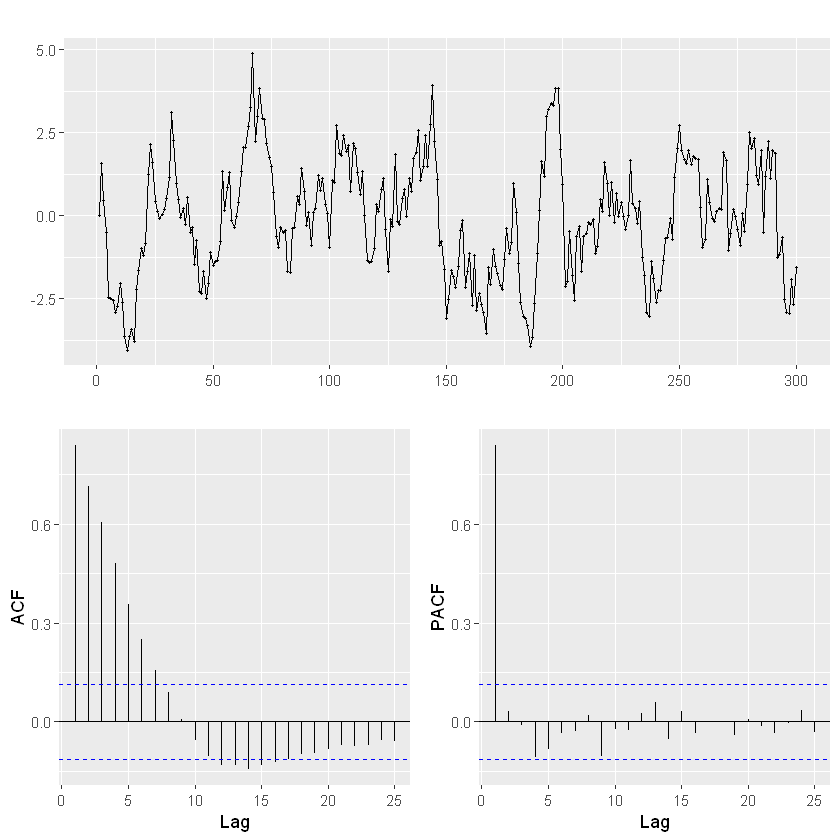

In [1]:
library(forecast)
library(ggplot2)
library(urca)

set.seed(12)

y <- ts(numeric(300))
e <- rnorm(300)

for (t in 2:300){
    y[t] <- 0.9*y[t-1]+e[t]  # ø
}

# 데이터 나누기
train <- window(y, start=1, end=250)
test <- window(y, start=251, end=300)

# ACF와 PACF를 통해 모형식별 및 원데이터 그려 눈으로 먼저 식별
ggtsdisplay(y)

# KPSS 통계검정 활용
summary(ur.kpss(train))

In [2]:
# kpss로부터 귀무가설 채택,
# 학습데이터를 가지고 모수 추정
ar_1 <- Arima(train, order=c(1,0,0))
#ar_1 <- Arima(train, order=c(1,0,0), include.mean=FALSE) # 절편이 없는 경우


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 6.2305, df = 8, p-value = 0.6214

Model df: 2.   Total lags used: 10




	Box-Ljung test

data:  ar_1$residuals
X-squared = 6.2305, df = 10, p-value = 0.7955


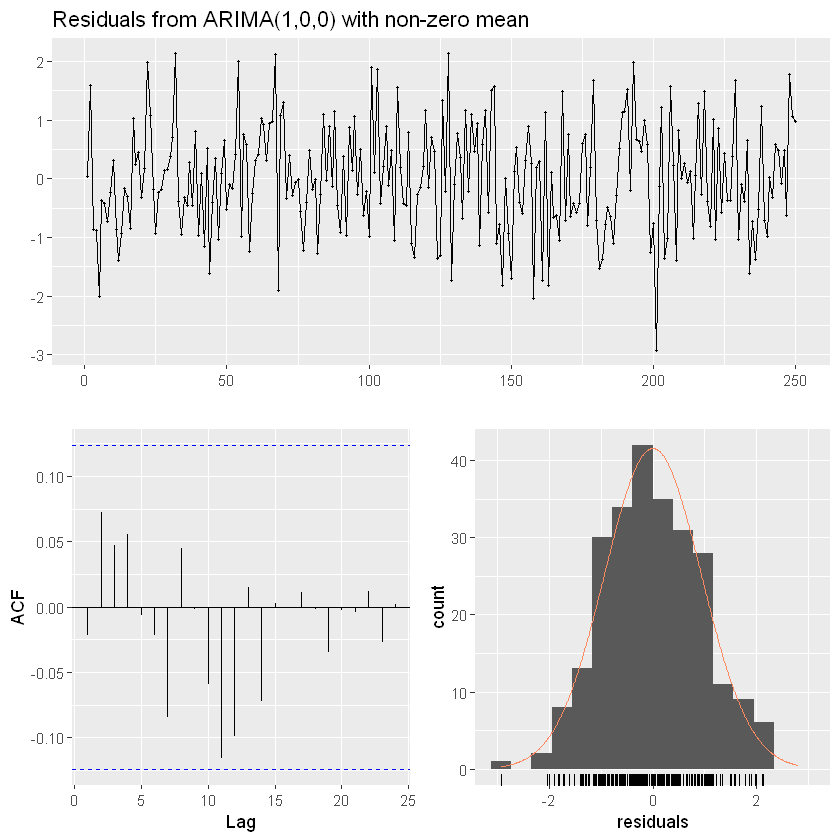

In [3]:
# 적합성 진단 way1
checkresiduals(ar_1)

# 또는 적합성 진단 way2를 위해 잔차를 인수로 넘기며 호출
Box.test(ar_1$residuals, lag=10, type="Ljung-Box")

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.0004903133,0.9332891,0.7591111,Inf,Inf,0.9739339,-0.02124509,NA
Test set,0.1100971535,1.3728920,1.0880767,82.35931,94.89698,1.3959944,0.68338357,0.949242


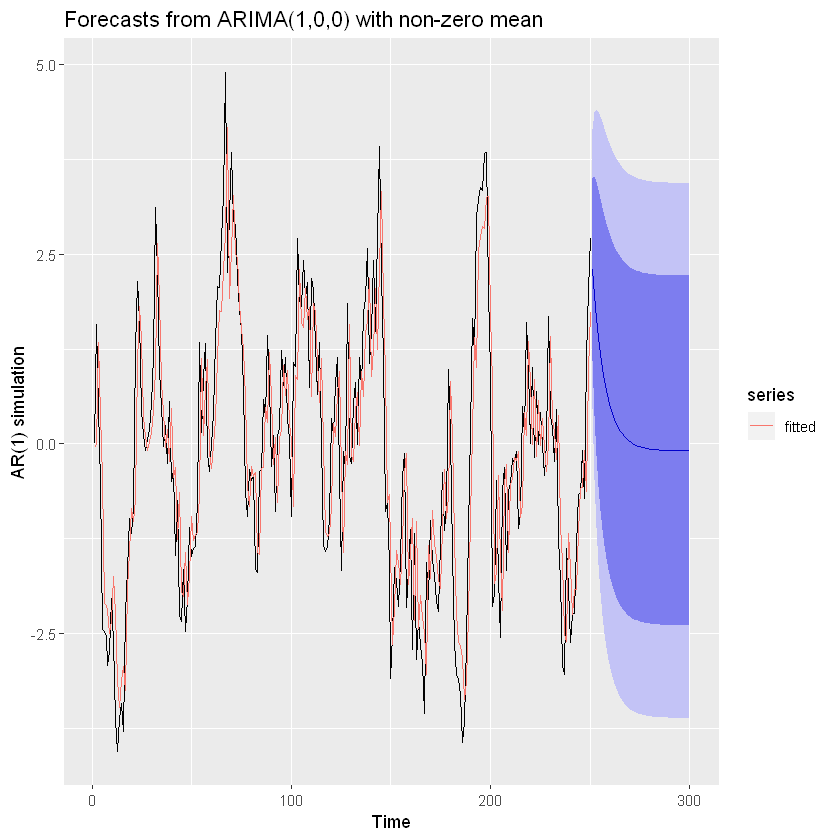

In [4]:
# 테스트
ar1_F <- forecast(ar_1, h=50)

# 예측성과 비교
accuracy(ar1_F, test)

# 적합 및 예측값 차트로 표현하기
autoplot(ar1_F)+autolayer(fitted(ar1_F),series="fitted")+xlab("Time") + ylab("AR(1) simulation")


	Ljung-Box test

data:  Residuals from Mean
Q* = 536.09, df = 9, p-value < 2.2e-16

Model df: 1.   Total lags used: 10




	Box-Ljung test

data:  m$residuals
X-squared = 536.09, df = 10, p-value < 2.2e-16


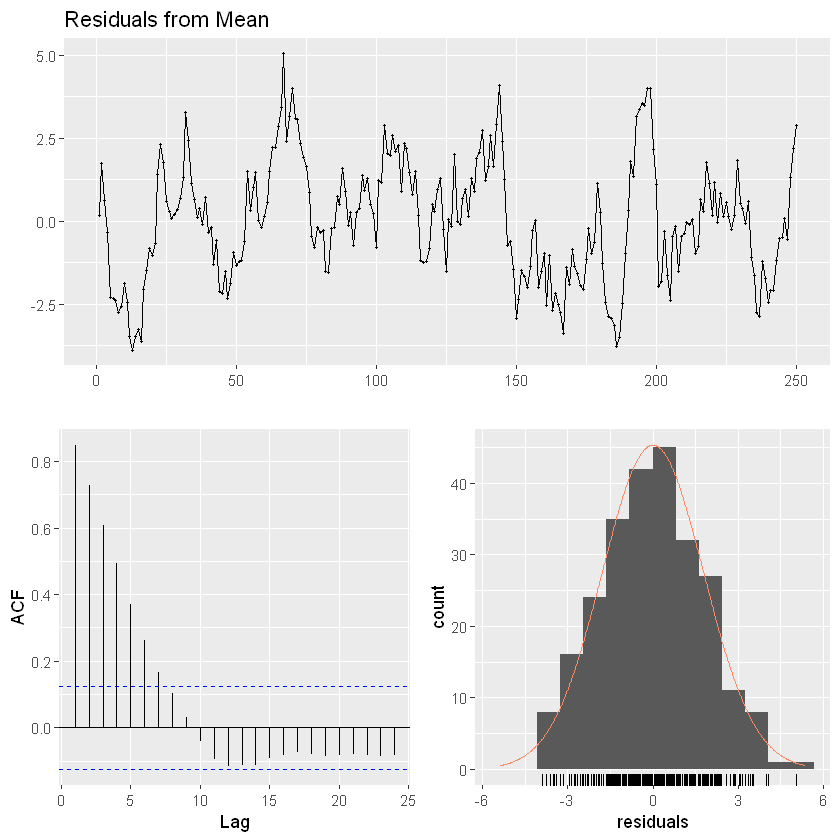

In [5]:
# meanf 모형 적합시키기
m <- meanf(train,h=50)

# 적합성 진단 way1
checkresiduals(m)

# 또는 적합성 진단 way2를 위해 잔차를 인수로 넘기며 호출
Box.test(m$residuals, lag=10, type="Ljung-Box")

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-5.920611e-18,1.786590,1.440418,Inf,Inf,1.848046,0.8482651,NA
Test set,5.048662e-01,1.559372,1.316300,78.30395,133.3748,1.688804,0.7103570,0.7023085


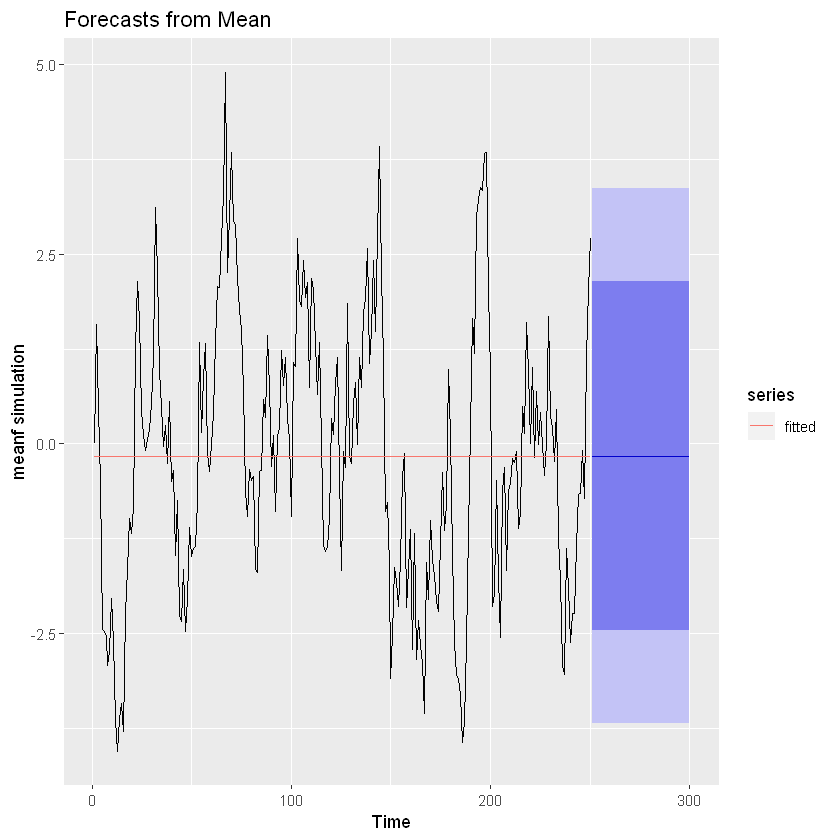

In [6]:
# 예측성과 비교 with 벤치마크
accuracy(m, test)

# 적합 및 예측값 차트로 표현하기
autoplot(m)+autolayer(fitted(m), series="fitted")+xlab("Time")+ylab("meanf simulation")


	Ljung-Box test

data:  Residuals from Random walk
Q* = 7.6869, df = 10, p-value = 0.6594

Model df: 0.   Total lags used: 10




	Box-Ljung test

data:  n$residuals
X-squared = 7.6869, df = 10, p-value = 0.6594


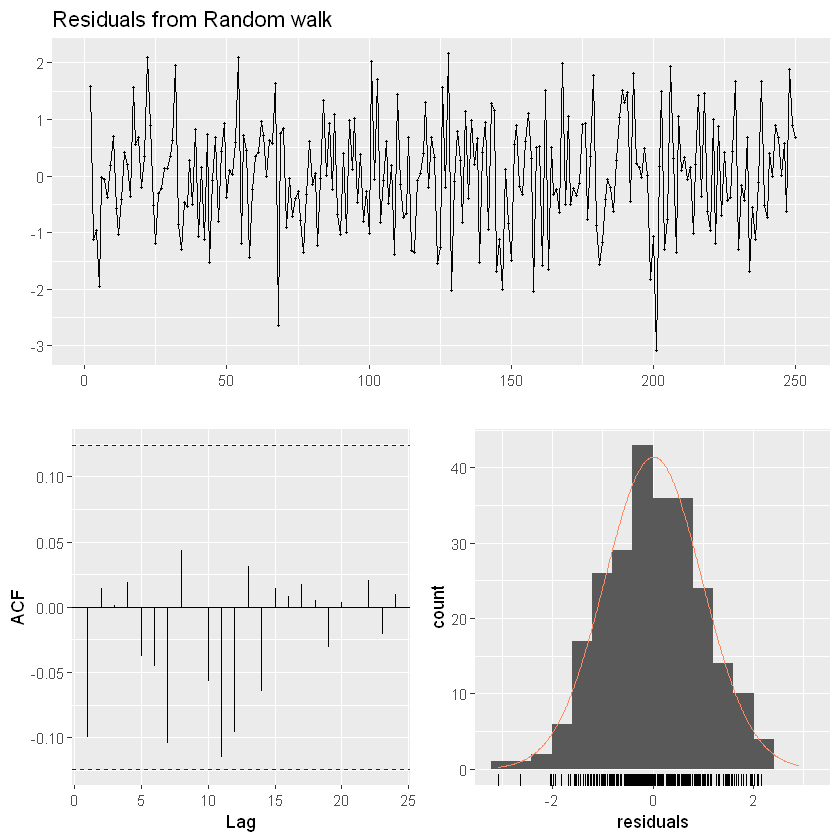

In [7]:
# naive 모형 적합시키기
n <- rwf(train,h=50)

# 적합성 진단 way1
checkresiduals(n)

# 또는 적합성 진단 way2를 위해 잔차를 인수로 넘기며 호출
Box.test(n$residuals, lag=10, type="Ljung-Box")

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.01089019,0.9691784,0.7794277,15.94859,280.7711,1.000000,-0.09991425,NA
Test set,-2.36718160,2.7893187,2.3671816,466.80653,950.4010,3.037077,0.71035696,7.486423


Warning message:
"Removed 1 rows containing missing values (geom_path)."


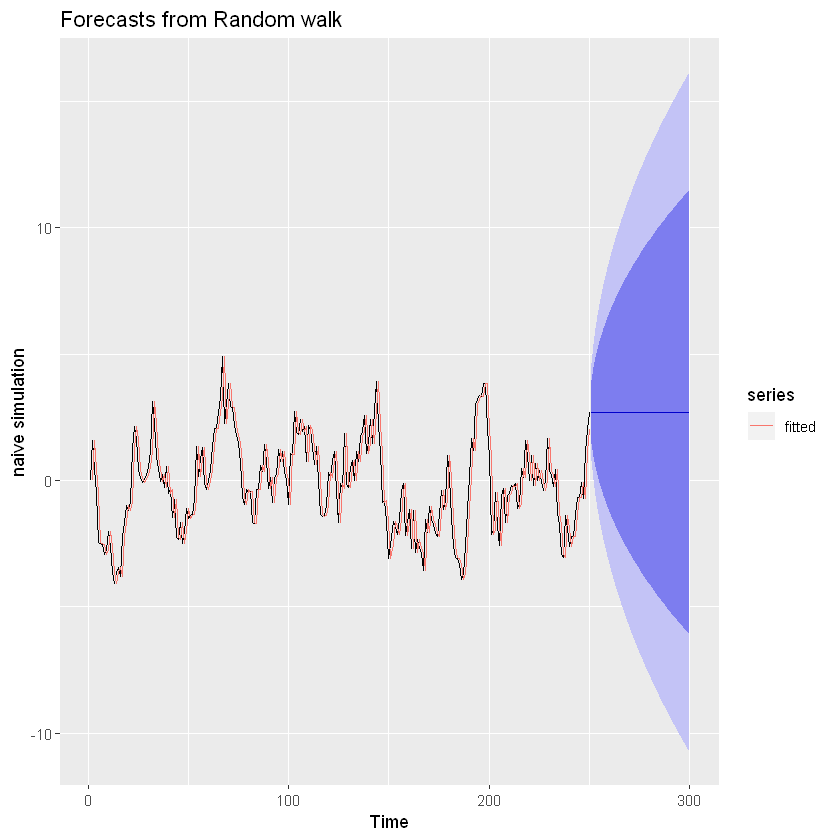

In [8]:
# 예측성과 비교 with 벤치마크
accuracy(n, test)

# 적합 및 예측값 차트로 표현하기
autoplot(n)+autolayer(fitted(n), series="fitted")+xlab("Time")+ylab("naive simulation")